<h3>무작정따라하기-9-3</h3>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

sns.set_theme(style="darkgrid") # 기본스타일
# sns.set_theme(style="whitegrid") # 깔끔한 격자
# sns.set_theme(style="dark") # 대비 강하게
# sns.set_theme(style="white") # 미니멀
# sns.set_theme(style="ticks") 

# ⭐⭐⭐
# seaborn이 테마를 적용하면서, font를 초기화 했을 수도 있기에
# 테마 적용 후 폰트 지정 v
plt.rcParams['font.family'] = "HCR Dotum"

In [8]:
data = pd.read_excel("K팀 대학 생활 만족도 설문(응답).xlsx")
data.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,남자,3학년,인사대,6,그렇다,보통,불만족,만족,3,학생회
1,2,여자,1학년,디자인대,6,그렇다,만족,만족,보통,3,아직은 모르겠다.
2,3,여자,1학년,과기대,6,그렇다,보통,보통,보통,4,모람제
3,4,여자,1학년,인사대,5,보통,만족,매우 불만족,보통,3,아직 없는듯
4,5,남자,1학년,과기대,6,그렇다,매우 불만족,매우 만족,만족,4,"동아리,소모임"


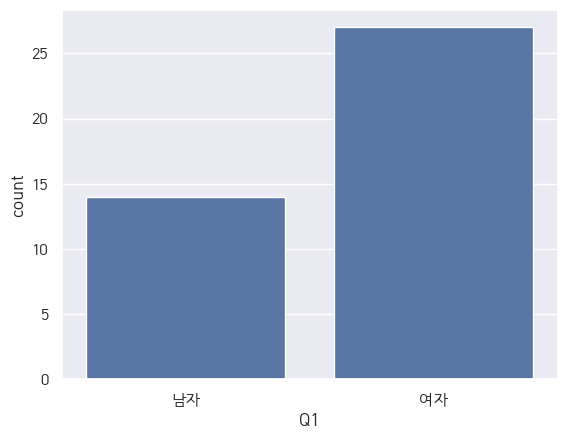

In [28]:
# countplot이기에 빈도인 y는 자동 계산, y지정 필요 x
sns.countplot(data, x='Q1')
plt.show()

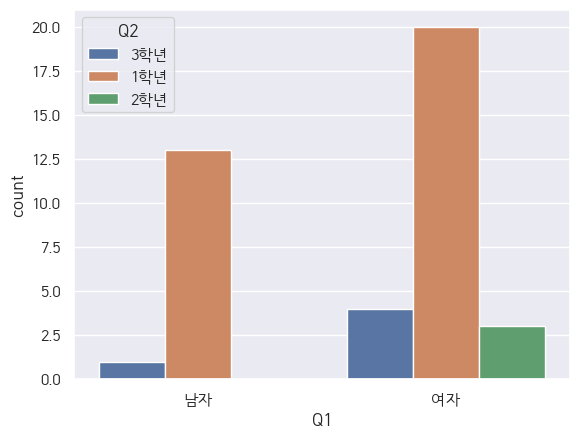

In [31]:
sns.countplot(data, x='Q1', hue='Q2')
plt.show()

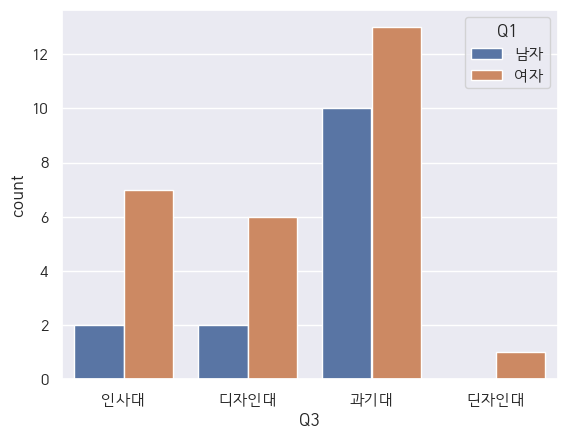

In [33]:
sns.countplot(data, x='Q3', hue='Q1')
plt.show()

In [35]:
df = pd.read_excel("고속터미널-25-10.xlsx")
df['day'] = df['date'] % 100
df.tail()

,date,line,stn,geton,getoff,day
88,20251030,7호선,고속터미널,18499,16164,30
89,20251030,9호선,고속터미널,16407,20940,30
90,20251031,3호선,고속터미널,58103,57720,31
91,20251031,7호선,고속터미널,22087,17232,31
92,20251031,9호선,고속터미널,19239,25235,31


In [38]:
grp = df.groupby('line') # groupby 객체 생성
round(grp[['geton', 'getoff']].agg(['mean', 'median', 'max']),1)



geton                   getoff                
         mean   median    max     mean   median    max
line                                                  
3호선   49513.4  48620.0  66433  48062.3  45415.0  66239
7호선   17570.5  18008.0  22087  13772.8  15469.0  18442
9호선   15384.5  15517.0  19779  20842.8  20180.0  28009

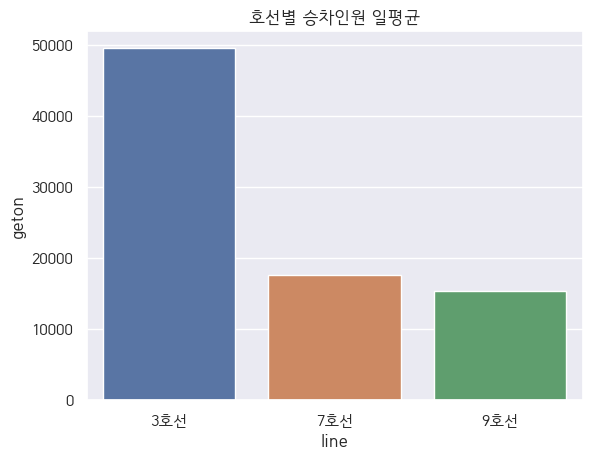

In [51]:
fig, ax = plt.subplots()
ax = sns.barplot(data=df, x='line', y='geton', estimator='mean', errorbar=None, hue='line')
# seaborn의 기본값은: estimator = mean
# 내부적으로 이런 일을 함. df.groupby('line')['geton'].mean()

# ax = sns.barplot(data=df, x='line', y='geton', estimator='max',errorbar=None, hue='line')
# ax = sns.barplot(data=df, x='line', y='geton', estimator='mean',hue='line')

# estimator='mean',     # 각 호선별 geton의 평균값을 계산하여 막대 높이로 사용
# errorbar=None         # 평균에 대한 오차막대(신뢰구간)를 표시하지 않음

ax.set_title("호선별 승차인원 일평균")
plt.show()

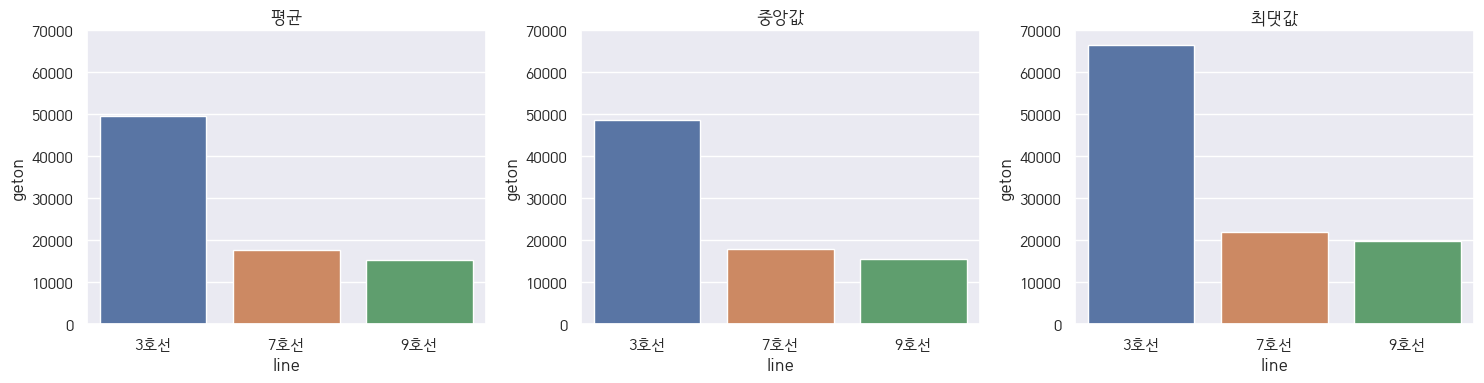

In [64]:
# 1행 3열로 그래프 그리기 
# plt.subplots(1,3)이든 plt.subplots(ncols=3)이든 같음 1행 3열
fig, axes = plt.subplots(1,3, figsize=(15,4))

for ax in axes:
    ax.set_ylim(0,70000)

sns.barplot(data=df, x='line', y='geton', estimator='mean', hue='line',
            errorbar=None, ax=axes[0])
axes[0].set_title("평균")

axes1 = sns.barplot(data=df, x='line', y='geton', estimator='median', hue='line',
            errorbar=None, ax=axes[1])
axes1.set_title("중앙값")

sns.barplot(data=df, x='line', y='geton', estimator='max', hue='line',
            errorbar=None, ax=axes[2])
axes[2].set_title("최댓값")

plt.tight_layout()
plt.show()

# ====================================================
# seaborn의 그래프 인자 
# : 어디(ax)에 그릴지 지정해주 그 ax 하나에만 그래프를 그린다
# ax = axes[0]에 그려


In [66]:
df_melt = df.melt(
    # 그대로 유지할 컬럼들 (식별 정보)
    id_vars=['date', 'line', 'stn', 'day'],

    # 세로로 펼칠 값 컬럼들
    # geton, getoff 각각의 값이 행으로 내려감
    value_vars = ['geton', 'getoff'],

    # 원래 컬럼명(geton / getoff)을 구분하기 위한 새 컬럼
    # → 승차인지 하차인지 표시
    var_name='type',

    # 실제 수치값을 담는 컬럼
    value_name='count'
)
df_melt


,date,line,stn,day,type,count
0,20251001,3호선,고속터미널,1,geton,46131
1,20251001,7호선,고속터미널,1,geton,17910
2,20251001,9호선,고속터미널,1,geton,15793
3,20251002,3호선,고속터미널,2,geton,53507
4,20251002,7호선,고속터미널,2,geton,19734
...,...,...,...,...,...,...
181,20251030,7호선,고속터미널,30,getoff,16164
182,20251030,9호선,고속터미널,30,getoff,20940
183,20251031,3호선,고속터미널,31,getoff,57720
184,20251031,7호선,고속터미널,31,getoff,17232


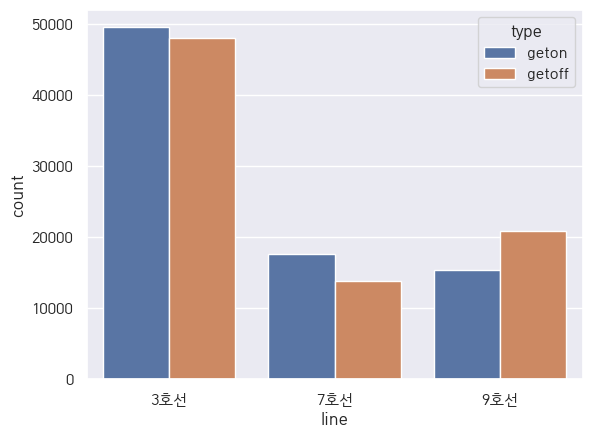

In [73]:
sns.barplot(data=df_melt, x='line', y='count', estimator='mean', hue='type', errorbar=None)
plt.show()

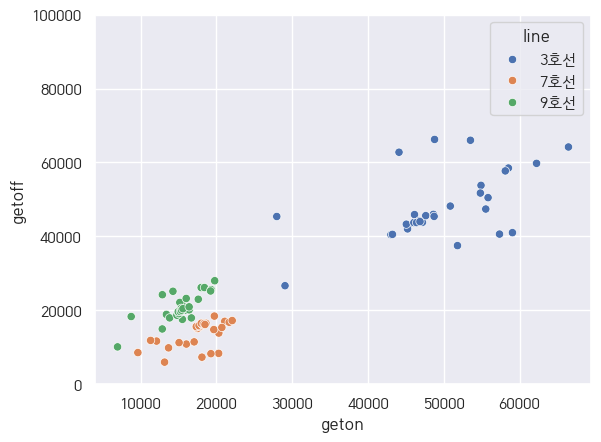

In [77]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='geton', y='getoff', hue='line',ax=ax)
ax.set_ylim(0,100000)
plt.show()

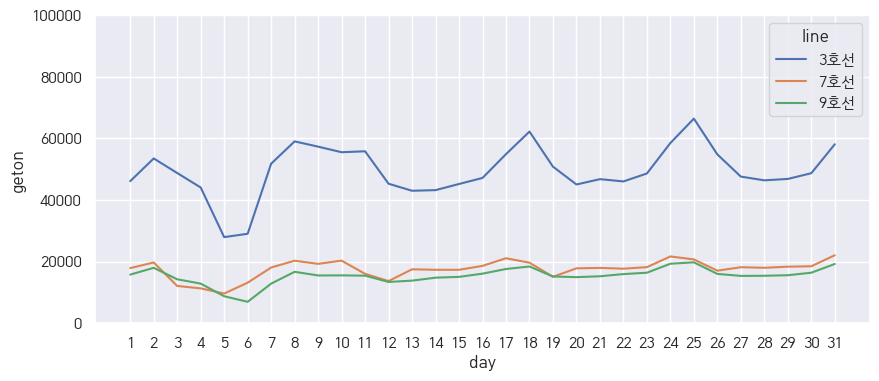

In [83]:
fig, axes = plt.subplots(figsize=(10,4))

sns.lineplot(data=df, x='day', y='geton', hue='line', ax=axes)
axes.set_xticks(np.arange(1,32))
axes.set_ylim(0,100000)

plt.show()

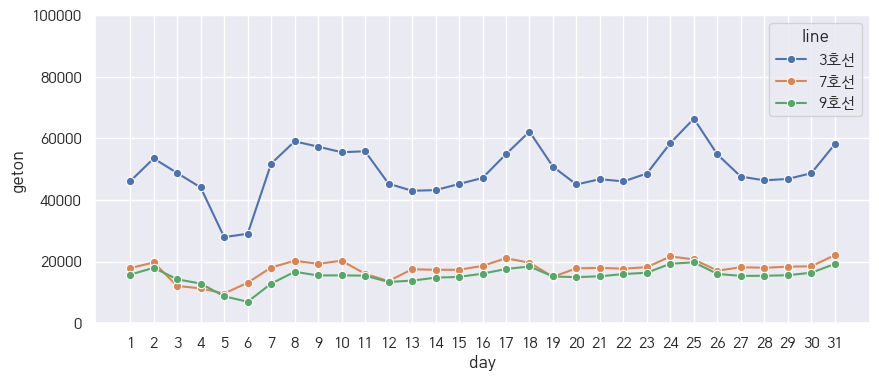

In [84]:
fig, axes = plt.subplots(figsize=(10,4))

sns.lineplot(data=df, x='day', y='geton', hue='line', marker='o', ax=axes)
axes.set_xticks(np.arange(1,32))
axes.set_ylim(0,100000)

plt.show()

In [86]:
ex3_melt = df_melt[df_melt['line'] == "3호선"]
ex3_melt

,date,line,stn,day,type,count
0,20251001,3호선,고속터미널,1,geton,46131
3,20251002,3호선,고속터미널,2,geton,53507
6,20251003,3호선,고속터미널,3,geton,48777
9,20251004,3호선,고속터미널,4,geton,44086
12,20251005,3호선,고속터미널,5,geton,27965
...,...,...,...,...,...,...
171,20251027,3호선,고속터미널,27,getoff,45617
174,20251028,3호선,고속터미널,28,getoff,43737
177,20251029,3호선,고속터미널,29,getoff,44013
180,20251030,3호선,고속터미널,30,getoff,45415


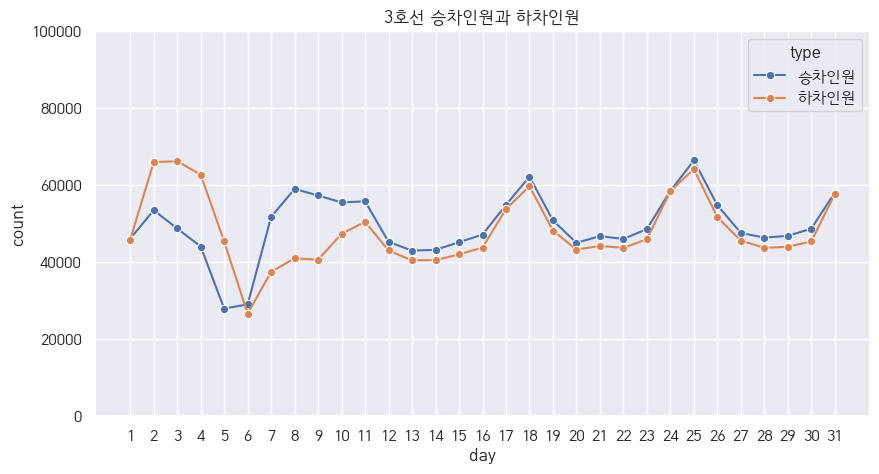

In [91]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=ex3_melt, x='day', y='count', hue='type', marker='o', ax=ax)
ax.set_xticks(np.arange(1,32))
ax.set_ylim(0,100000)
ax.set_title("3호선 승차인원과 하차인원")

# legend 라벨 순서를 hue값 기준으로 안전하게 변경
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['승차인원', '하차인원'], title = 'type')
plt.show()

In [93]:
# 현재 axes에 생성된 legend 정보 가져오기
# handles : 실제 그래프 객체(선/막대 등), 그려진 순서대로 저장됨
# labels  : 각 그래프 객체에 대응되는 원래 hue 값 이름
#           (데이터/환경에 따라 순서가 달라질 수 있음)
# handles, labels = ax.get_legend_handles_labels()

# 그래프 객체(handles)와 정확히 매칭된 라벨로 legend 재설정
# → hue 순서가 바뀌어도 그래프-라벨 매칭이 깨지지 않음
# ax.legend(handles, new_labels)

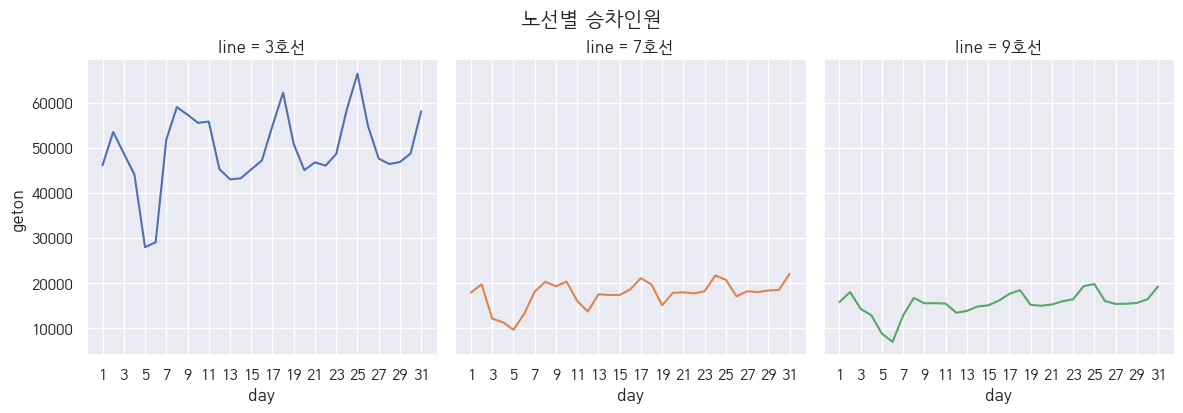

In [ ]:
g = sns.relplot(data=df, x='day', y='geton', hue='line', legend=False, col='line', kind='line', height=4, aspect=1)
# kind : 어떤 종류 그래프를 그릴지
# col = 'line' 주면 각 ax에 대해 seaborn이 자동 제목 옵션 설정 relplot 자동 옵션 set_title() 안 해도 자동 생성됨.
#   legend=False,    # 범례 제거 (이미 col로 구분됨)
# height=4,        # subplot 하나의 세로 크기 (inch)
# aspect=1         # 가로/세로 비율 (가로 = height × aspect)


for ax in g.axes.flatten():
    ax.set_xticks(np.arange(1,33,2))
g.fig.suptitle("노선별 승차인원", y=1.03)
plt.show()


In [ ]:
# figure-level 함수

# sns.relplot은 figure-level 함수로, 하나의 ax에 그리는 것이 아니라 조건(col, row 등)에 따라 여러 개의 subplot(ax) 객체를 자동으로 생성한다.
# 이때 반환되는 g는 FacetGrid 객체이며, g.axes에는 생성된 모든 subplot의 Axes 객체들이 "행 x 열 형태의 2차원 배열"로 저장된다.

# 예를 들어 col='line'이고 노선이 3개라면,
# 실제 구조는 1행 3열이므로 g.axes의 형태는 다음과 같다.
# g.axes = [[ax0, ax1, ax2]]

# matplotlib/seaborn은 subplot을 항상 (행, 열) 구조로 관리하기 때문에
# 열만 나눈 경우에도 axes는 2차원 배열로 유지된다.

# flatten()은 이 2차원 axes 배열을 1차원으로 펼쳐
# [ax0, ax1, ax2] 형태로 만들어 주는 함수이다.
# if 2행 3열이라면 [[ax00, ax01, ax02], [ax10, ax11, ax12]]를 [ax00,ax01,ax02,ax10,ax11,ax12]로 바꿔준다.

# for문을 돌려 이를 사용하면 subplot의 행/열 개수와 상관없이 모든 ax에 동일한 설정(눈금, 범위 등)을 반복문으로 안전하게 적용하기 위해 flatten을 적용한다.


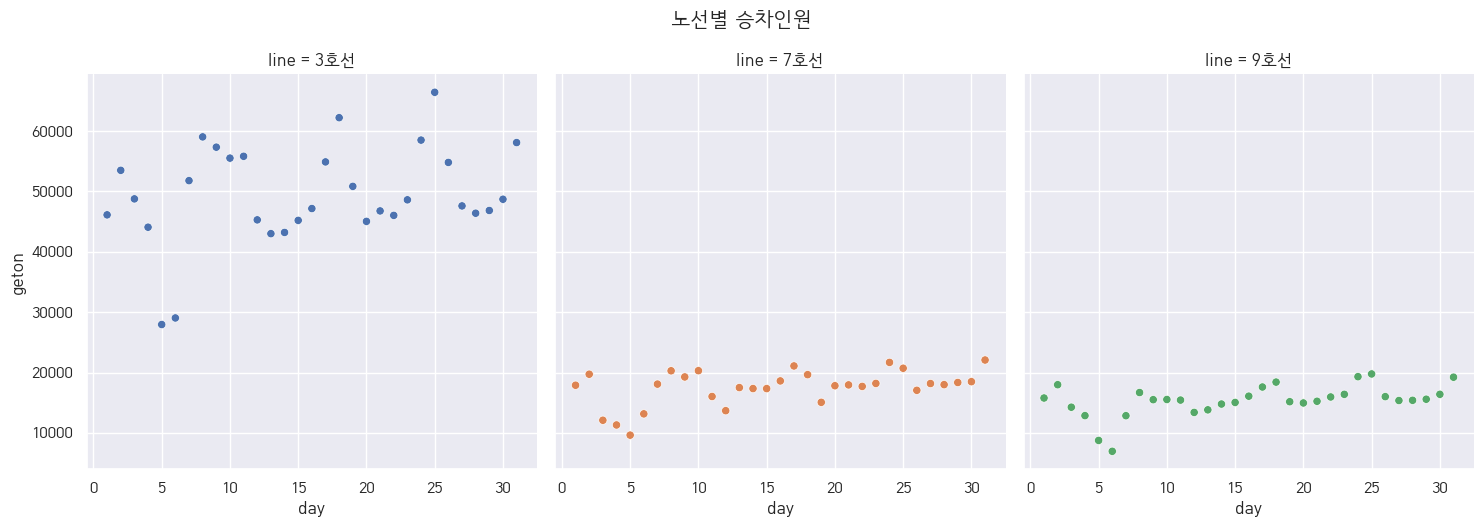

In [108]:
g = sns.relplot(data=df, x='day', y='geton', hue='line', col='line', kind='scatter', height=5, aspect=1, legend=False)
g.fig.suptitle("노선별 승차인원", y=1.05) # nor settitle, suptitle , y = 전체 제목(suptitle)과 subplot(ax)들 사이의 세로 간격 조절
plt.show()

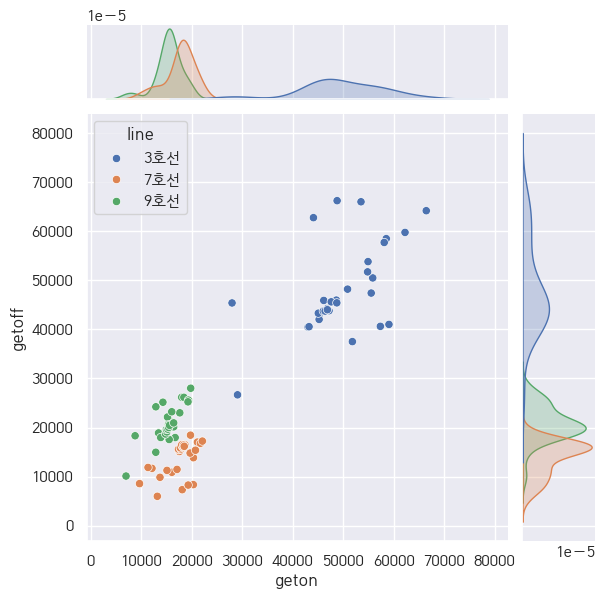

In [110]:
# jointplot
# 가운데: 두 변수 관계 (보통 scatter)
# 위쪽: x 변수 분포
# 오른쪽: y 변수 분포

sns.jointplot(data=df, x='geton', y='getoff', hue='line')
plt.show()

In [112]:
df = pd.read_csv("서울시대기오염_2025-10(UTF-8).csv")
gn = df[df['point'] == "강남구"]
gn.head(10)

,data,point,pm,fpm,ozon
0,20251001,강남구,32.0,20.0,0.0310
50,20251002,강남구,28.0,17.0,0.0291
100,20251003,강남구,26.0,16.0,0.0253
150,20251004,강남구,11.0,4.0,0.0318
200,20251005,강남구,10.0,4.0,0.0155
250,20251006,강남구,6.0,1.0,0.0269
300,20251007,강남구,4.0,1.0,0.0274
350,20251008,강남구,10.0,4.0,0.0246
400,20251009,강남구,10.0,3.0,0.0251
450,20251010,강남구,7.0,2.0,0.0159


In [114]:
gn[['pm']].agg(['min', 'max'])

,pm
min,4.0
max,38.0


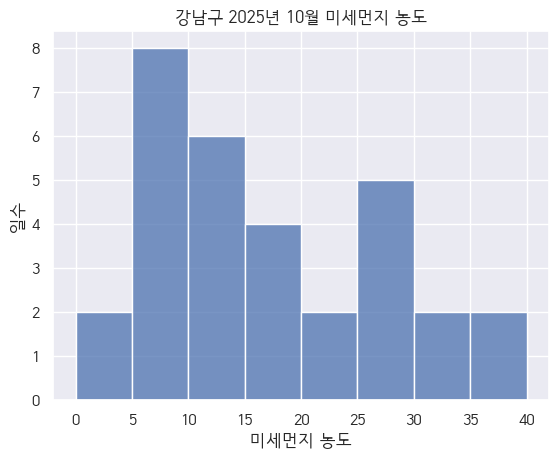

In [120]:
fig, ax = plt.subplots()

ax = sns.histplot(data=gn, x='pm', bins=np.arange(0,45,5))
ax.set_xticks(np.arange(0,45,5))
ax.set_title("강남구 2025년 10월 미세먼지 농도")
ax.set_ylabel("일수")
ax.set_xlabel("미세먼지 농도")
plt.show()

In [122]:
gu5 = ["강남구", "강서구", "강동구", "강북구", "중구"]
data = df[df['point'].isin(gu5)]
data

,data,point,pm,fpm,ozon
0,20251001,강남구,32.0,20.0,0.0310
2,20251001,강동구,37.0,23.0,0.0359
4,20251001,강북구,27.0,17.0,0.0380
5,20251001,강서구,30.0,19.0,0.0285
41,20251001,중구,30.0,21.0,0.0411
...,...,...,...,...,...
1500,20251031,강남구,36.0,19.0,0.0227
1502,20251031,강동구,41.0,25.0,0.0244
1504,20251031,강북구,31.0,18.0,0.0297
1505,20251031,강서구,39.0,22.0,0.0210


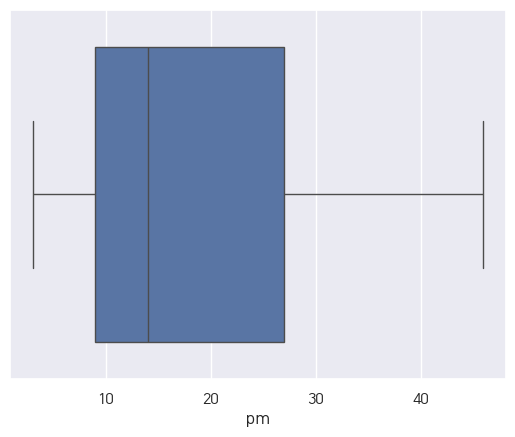

In [124]:
sns.boxplot(data, x='pm')
plt.show()

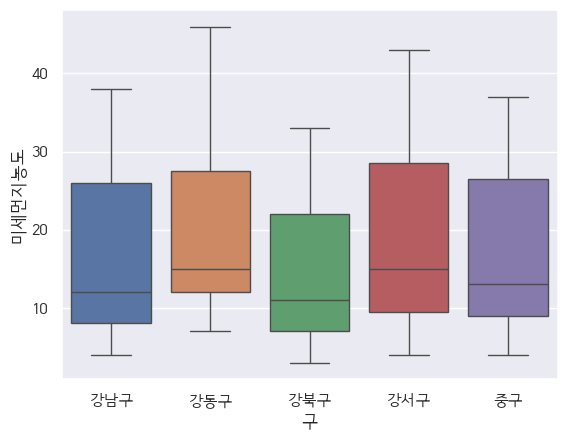

In [130]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x='point', y='pm', hue='point',ax=ax)
ax.set_xlabel("구")
ax.set_ylabel("미세먼지농도")
plt.show()

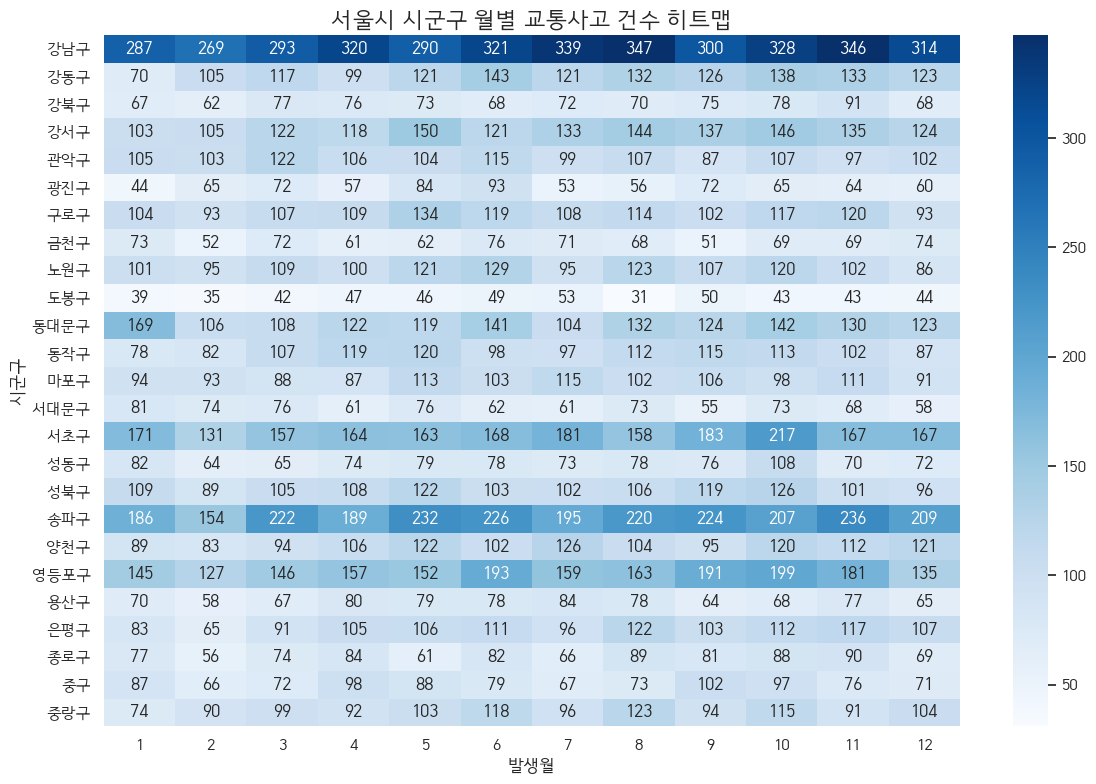

In [137]:
# 히트맵 그래프

df = pd.read_excel("한국도로교통공단_일자별 시군구별 교통사고 통계_20241231.xlsx")
df_seoul = df[df['시도'] == '서울']

pivot = df_seoul.pivot_table(
    index = '시군구', # 행!
    columns = '발생월', # 열
    values = '사고건수', # 값: 사고건수
    aggfunc = 'sum' # 합계
)

# heatmap
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("서울시 시군구 월별 교통사고 건수 히트맵", fontsize=16)
sns.heatmap(pivot, cmap='Blues', 
            annot = True, # 각 셀 안에 숫자 값을 직접 표시
            fmt = 'g', # 정수 그대로 표시
            ax = ax
            )

            # fmt 의미 'g' : 불필요한 소수점 없이 표시 (가장 무난, 알아서 이쁘게) / 'd' 정수(integer) : 정수만 가능 / '.2f' 소수점 둘째 자리까지 '.1f' 소수점 한 자리까지
ax.set_xlabel("발생월")
ax.set_ylabel("시군구")
plt.tight_layout() # figure 안에 있는 모든 subplot(ax)들의 위치를 자동으로 조정해서 라벨, 제목, 눈금이 서로 겹치지 않게 해주는 함수
plt.show()